<a href="https://colab.research.google.com/github/Priyanka-Gangadhar-Palshetkar/probability/blob/main/Junior_Analyst_(exercise).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Junior Analyst problem

To recap, the rules:

1. There is a single position to fill.
2. There are $n$ applicants for the position, and the value of $n$ is known.
3. The applicants, if seen altogether, can be ranked from best to worst unambiguously.
4. The applicants are interviewed sequentially in random order, with each order being equally likely.
5. Immediately after an interview, the interviewed applicant is either accepted or rejected, and the decision is irrevocable.
6. The decision to accept or reject an applicant can be based only on the relative ranks of the applicants interviewed so far.

The objective of the general solution is to have the highest probability of selecting the best applicant of the whole group. This is the same as maximizing the expected payoff, with payoff defined to be one for the best applicant and zero otherwise.

## Discovering the optimal strategy

In the previous class we discussed that, to gauge the general level of candidates, there will have to be some number of rejections, after which the strategy will be to accept the first candidate that reaches a some threshold of performance. What is the "optimal" number of rejections?

## Task 1

Fix some $n$, say $n=20$ (rule 2), and simulate some random order (rule 4). Since we need to distinguish the candidates from best to worst (rule 3), simulating an order is equivalent to assigning distinct performance scores 1, ..., n (or 0, ..., n-1 for ease of programming). 

To start, let's consider the policy of always selecting the first candidate. By simulating different orderings for a large number of recruitment scenarios (say, 1,000 or 10,000), compute the fraction of simulations where the first candidate is the best. Does this correspond to your probabilistic intuition?



In [ ]:
import numpy as np

n = 20

first_best = 0
for _ in range(10000):
  # simulating a random ordering of candidates in terms of their performance scores
  perm = np.random.permutation(n)

  # check if the strategy of hiring first candidate succeeds (which means that the first candidate was best and has the highest score)
  if perm[0] == 19:
    first_best += 1

# return how many times the first candidate was indeed best out of all experiments
first_best / 10000

0.0509

Similarly, explore what happens when you observe all the candidates and accept the last one (which needs to happen irrespective of the score: in order to observe the last candidate, everyone else had to be rejected). What is the probability of accepting the best candidate then?

In [ ]:
last_best = 0
for _ in range(10000):
  # simulating a random ordering of candidates in terms of their performance scores
  perm = np.random.permutation(n)

  # check if the strategy of hiring last candidate succeeds (which means that the last candidate was best and has the highest score)
  if perm[19] == 19:
    last_best += 1

# return how many times the last candidate was indeed best out of all experiments
last_best / 10000

0.0527

## Task 2

Clearly, neither strategy uses the information of observing the relative rankings of _some_ number of candidates before making the decision. 

To address this, suppose we now reject the first $r-1$ candidates to gauge the level of candidates and make the decision starting with the $r$-th candidate. 

We do not want to accept the $r$-th candidate who is not at least as good as the best candidate we have seen so far (who has obtained a reference score $s$). What is the probability that the $r$-th candidate is the best candidate among the candidates observed? How does this value change with $r$?

Try computing the probability for a fixed $r$ and then experiment with different values of $r$. What can you conclude from this?


In [ ]:
import numpy as np

n=20
for r in range(1,n):
  rth_best=0
  for _ in range(10000):
    # simulating a random ordering of candidates in terms of their performance scores
    perm = np.random.permutation(n)
    before_r = perm[:r]
    max = np.max(before_r)

    if max < perm[r]:
      rth_best +=1
  print(r, rth_best/10000)


1 0.5099
2 0.3341
3 0.2512
4 0.2059
5 0.1618
6 0.142
7 0.1253
8 0.1089
9 0.1005
10 0.0925
11 0.0822
12 0.0757
13 0.0721
14 0.0668
15 0.0638
16 0.0594
17 0.0571
18 0.0534
19 0.0482


## Task 3

If the $r$-th observed candidate is not among the best, we could choose to keep rejecting the candidates until we find the first one that outperforms the candidate of the reference score. 

Simulate this process. 
* For a fixed $r$ and $n$, what is the probability of accepting the best candidate?
* For a fixed $n$, what is the $r$ that maximises that probability?

In [ ]:
import numpy as np

def func_find_best(r,n):
  found_best=0   
  best = 0
  picked = 0             
  for _ in range(10000):
    perm = np.random.permutation(n) # complete list of ranks - # 1 7 19 18 ..............
    before_r = perm[:r] 
    max = np.max(before_r) # this is the best among the rejected r

    best = np.argmax(perm) # position of the best candidate in all n
  
    for k in range(r,n): 
      if (perm[k] > max):   
        picked = k          # position of our picked candidate
        break

    if picked==best:
      found_best+=1
  
  return found_best/10000

In [ ]:
from matplotlib import pyplot as plt
def best_r_for_n(n):
  best_prob = 0
  best_r = 0
  r_list = []
  prob_list = []
  for r in range(1,n):
    r_list.append(r)
    prob_list.append(func_find_best(r, n))
    if best_prob < func_find_best(r, n):
      best_prob = func_find_best(r, n)
      best_r = r
  
  # plt.plot(r_list, prob_list)
  # plt.show()
  return best_r, best_prob

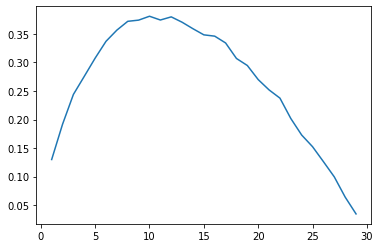

11

In [ ]:
best_r_for_n(30)

## Task 4

Experimenting with larger values of $n$, find the corresponding best threshold $r$. Try plotting the pattern of the best $r$s for different $n$s. 

Can you observe a pattern?

_Note_: this might take a while, depending on the number of simulations and $n$.

In [ ]:
from matplotlib import pyplot as plt # n vs best r
def plot_best():
  N = np.arange(2,50,1)
  n = []
  r = []
  prob = []
  for i in N:
    n.append(i)
    best_r = best_r_for_n(i)
    r.append(best_r[0])
    prob.append(best_r[1])

  plt.subplot(1, 2, 1)
  plt.plot(n,r)

  plt.subplot(1, 2, 2)
  plt.plot(n,prob)

  plt.show()

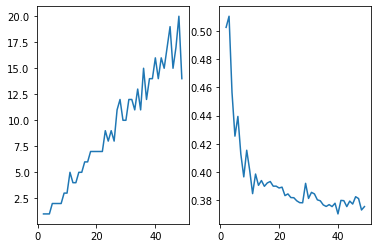

In [ ]:
plot_best()